In [1]:
import pickle
import pandas as pd
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
on2onlabel = dict()
for idx, name in enumerate(os.listdir('/Users/julianalverio/code/objectnet-oct-24-d123')):
    on2onlabel[name] = idx
onlabel2name = {v: k for k, v in on2onlabel.items()}

In [6]:
# file_path = '/Users/julianalverio/code/resnet/runs/1_examples_113_classes_50_epochs'
file_paths = os.listdir('/Users/julianalverio/code/resnet/runs/')
file_paths.remove('1_examples_113_classes_50_epochs')

In [4]:
def get_totals(record_dict):
    scores = np.array([0, 0]).astype(np.float64)
    for value in record_dict.values():
        scores += value
    return scores

def process_file(path):
    split_info = path.split('/')[-1].split('_')
    num_examples = int(split_info[0])
    num_epochs = int(split_info[4])
    num_classes = int(split_info[2])
    if num_classes == 113:
        dataset = 'IM overlap ON'
    else:
        dataset = 'Full ON'
    prefix = '/Users/julianalverio/code/resnet/runs/'
    with open(prefix + path, 'rb') as f:
        data = pickle.load(f)
    
    totals = np.array([get_totals(record_dict) for record_dict in data])
    scores = totals / (num_examples * num_classes)
    plot(scores, dataset, num_examples)
    
def plot(scores, dataset, num_examples):
    data = pd.DataFrame(scores)
    data.columns = ['top1 score', 'top5 score']
    ax = data.plot(title='%s examples, dataset: %s' % (num_examples, dataset))
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Score")
    plt.show()
    

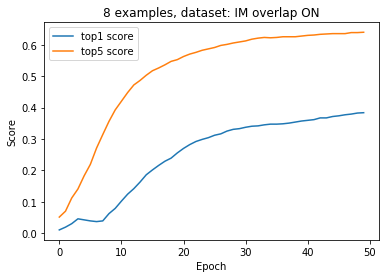

[None]

In [7]:
[process_file(file_path) for file_path in file_paths]